In [78]:
import numpy as np

file_path = r"D:\bai_work_win\AngioMorph\bai_output\curve_aneurisk_aligned.npy"
file_path0 = r"D:\bai_work_win\AngioMorph\bai_output\curve_aneurisk_usable.npy"

b = np.load(file_path)

print(b.shape)
print(b)


(51, 119, 3)
[[[-3.21776454e-03 -5.25050703e-03  3.85208498e-04]
  [-7.10159959e-03 -1.09704214e-02  1.21574195e-03]
  [-1.14865216e-02 -1.69171919e-02  2.36784719e-03]
  ...
  [ 1.69610714e-01 -3.68265671e-01  2.32168530e-01]
  [ 1.69328336e-01 -3.73429926e-01  2.34786291e-01]
  [ 1.69136161e-01 -3.78140995e-01  2.37290975e-01]]

 [[ 1.94391010e-03 -7.15847918e-03  2.91191748e-02]
  [ 4.00930254e-03 -1.47007320e-02  4.22512566e-02]
  [ 6.45497334e-03 -2.28447738e-02  5.21889013e-02]
  ...
  [ 2.21617475e-01 -4.91765591e-01  2.18287537e-01]
  [ 2.01831329e-01 -5.07351559e-01  2.30247464e-01]
  [ 1.83918135e-01 -5.22221242e-01  2.39375908e-01]]

 [[ 4.34359826e-03 -3.36653424e-03 -6.59890427e-03]
  [ 4.81839985e-03 -3.71119517e-03 -7.25793224e-03]
  [ 5.04395098e-03 -3.87387743e-03 -7.56756551e-03]
  ...
  [ 2.61446215e-01 -4.36000060e-01  4.13215887e-01]
  [ 2.61673221e-01 -4.36010384e-01  4.13306907e-01]
  [ 2.61906295e-01 -4.36021192e-01  4.13400513e-01]]

 ...

 [[-1.07043998e-03 -5

In [80]:
import vtk
import numpy as np

# 假设已经加载了数据
data = np.load(file_path0)

# 定义函数来创建和写入单条曲线的VTK文件
def write_vtk_curve(data, index, output_file):
    points = vtk.vtkPoints()
    lines = vtk.vtkCellArray()

    # 插入点并创建一条曲线
    line = vtk.vtkPolyLine()
    line.GetPointIds().SetNumberOfIds(data.shape[0])  # 设置点的数量
    for j in range(data.shape[0]):
        points.InsertNextPoint(data[j])
        line.GetPointIds().SetId(j, j)
    lines.InsertNextCell(line)

    # 创建一个vtkPolyData对象来保存点和连接信息
    poly_data = vtk.vtkPolyData()
    poly_data.SetPoints(points)
    poly_data.SetLines(lines)

    # 写入VTK文件
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(output_file)
    writer.SetInputData(poly_data)
    writer.Write()

# 为每条曲线创建单独的VTK文件
for i in range(data.shape[0]):
    output_file = f"bai_output/aneurisk_cut_usable/curve_{i}.vtk"
    write_vtk_curve(data[i], i, output_file)

# 创建包含所有曲线的文件
points = vtk.vtkPoints()
lines = vtk.vtkCellArray()
point_id = 0
for i in range(data.shape[0]):
    line = vtk.vtkPolyLine()
    line.GetPointIds().SetNumberOfIds(data.shape[1])
    for j in range(data.shape[1]):
        points.InsertNextPoint(data[i, j])
        line.GetPointIds().SetId(j, point_id + j)
    lines.InsertNextCell(line)
    point_id += data.shape[1]

# 创建一个vtkPolyData对象来保存点和连接信息
all_curves_poly_data = vtk.vtkPolyData()
all_curves_poly_data.SetPoints(points)
all_curves_poly_data.SetLines(lines)

# 写入包含所有曲线的VTK文件
all_curves_writer = vtk.vtkPolyDataWriter()
all_curves_output_file = "bai_output/aneurisk_cut_usable/all_curves.vtk"
all_curves_writer.SetFileName(all_curves_output_file)
all_curves_writer.SetInputData(all_curves_poly_data)
all_curves_writer.Write()

print(f"所有曲线的VTK文件已保存至: {all_curves_output_file}")
print("每条单独曲线的VTK文件已保存在 'bai_output' 文件夹中。")


所有曲线的VTK文件已保存至: bai_output/aneurisk_cut_usable/all_curves.vtk
每条单独曲线的VTK文件已保存在 'bai_output' 文件夹中。


In [8]:
# import numpy as np
# import vtk

# # 加载NumPy数组
# file_path = "D:\\bai_work_win\\AngioMorph\\geom_aligned_curves\\geomstats_aligned_to_frechet.npy"
# data = np.load(file_path)

# # 计算平均形状
# average_shape = np.mean(data, axis=0)

# # 创建VTK点数据和折线连接信息
# points = vtk.vtkPoints()
# polyline = vtk.vtkPolyLine()
# polyline.GetPointIds().SetNumberOfIds(average_shape.shape[0])  # 设置点的数量

# # 插入平均形状的点，并添加点到折线
# for i, point in enumerate(average_shape):
#     points.InsertNextPoint(point.tolist())
#     polyline.GetPointIds().SetId(i, i)

# # 创建包含折线的vtkCellArray
# lines = vtk.vtkCellArray()
# lines.InsertNextCell(polyline)

# # 创建vtkPolyData对象来保存点和连接信息
# poly_data = vtk.vtkPolyData()
# poly_data.SetPoints(points)
# poly_data.SetLines(lines)

# # 写入VTK文件（使用旧式的VTK文件格式）
# writer = vtk.vtkPolyDataWriter()
# output_file = "bai_output/average_shape.vtk"
# writer.SetFileName(output_file)
# writer.SetInputData(poly_data)
# writer.Write()

# print(f"形状的VTK文件已保存至: {output_file}")


平均形状的VTK文件已保存至: bai_output/average_shape.vtk


# Start

In [23]:
# 【不动】头文件和函数定义
import sys
sys.path.append('D:\\bai_work_win\\AngioMorph\\src')

import numpy as np 
import glob 
import vtk
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from AngioMorphPCA.preprocessing import parameterize_curve, calculate_3d_curve_abscissas,remove_high_freq_components
from AngioMorphPCA.io import Get_simple_vtk, makeVtkFile, mkdir
from scipy.integrate import simps
from AngioMorphPCA.GenerateDiffHemeo import generate_diff_homeomorphism
from AngioMorphPCA.srvf_rep import compute_srvf_func, reconstruct_curve_from_srvf
from AngioMorphPCA.L2distance import calculate_l2_distance
from AngioMorphPCA.compute_geometry import compute_curvature_and_torsion,build_curve_from_curvatures
from tqdm import tqdm
import matplotlib.pyplot as plt
from geomstats.learning.frechet_mean import FrechetMean
import geomstats.backend as gs
from geomstats.geometry.discrete_curves import (
    DiscreteCurvesStartingAtOrigin,
    SRVMetric,
    insert_zeros,
)

def output_vtk_file(shape, output_file):
    # 创建VTK点数据和折线连接信息
    points = vtk.vtkPoints()
    polyline = vtk.vtkPolyLine()
    polyline.GetPointIds().SetNumberOfIds(shape.shape[0])  # 设置点的数量

    # 插入平均形状的点，并添加点到折线
    for i, point in enumerate(shape):
        points.InsertNextPoint(point.tolist())
        polyline.GetPointIds().SetId(i, i)

    # 创建包含折线的vtkCellArray
    lines = vtk.vtkCellArray()
    lines.InsertNextCell(polyline)

    # 创建vtkPolyData对象来保存点和连接信息
    poly_data = vtk.vtkPolyData()
    poly_data.SetPoints(points)
    poly_data.SetLines(lines)

    # 写入VTK文件（使用旧式的VTK文件格式）
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(output_file)
    writer.SetInputData(poly_data)
    writer.Write()

    print(f"形状的VTK文件已保存至: {output_file}")



def compute_centroid(curves):
    centroid = np.mean(curves, axis=0)
    return np.array(centroid)
def translate_to_centroid(curves):
    centroid = compute_centroid(curves)
    new_curves = []
    for i in range(len(curves)):
        new_curves.append(curves[i] - centroid)
    return np.array(new_curves)

def plot_curve(curve, ax=None, add_origin=True):
    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection="3d")

    if add_origin:
        curve = insert_zeros(curve, axis=-2)

    ax.plot(*[curve[:, k] for k in range(3)])
    ax.scatter(*[curve[0, k] for k in range(3)])
    return ax

def plot_geodesic(geod_points, ax=None, add_origin=True):
    n_times = geod_points.shape[0]
    k_sampling_points = geod_points.shape[-2] + 1

    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection="3d")

    if add_origin:
        geod_points = insert_zeros(geod_points, axis=-2)

    ax.plot(*[geod_points[0, :, k] for k in range(3)],  c="b", linewidth=2)
    ax.plot(*[geod_points[-1, :, k] for k in range(3)], c="r", linewidth=2)

    for i in range(1, n_times - 1):
        ax.plot(*[geod_points[i, :, k] for k in range(3)], c="k", linewidth=1)

    for j in range(k_sampling_points - 1):
        ax.plot(*[geod_points[:, j, k] for k in range(3)], c="k", linewidth=1)

    return ax

In [25]:
brava_files = glob.glob('brava_ica_mirrored/*.vtk')
aneurisk_files = glob.glob('aneurisk_ica_mirrored/*.vtk')

Len_brava = len(brava_files)
Len_aneurisk = len(aneurisk_files)

print(Len_brava, Len_aneurisk)
resample_num=120

79 52


D:\bai_work_win\AngioMorph\src\AngioMorphPCA\compute_geometry.py:38: RuntimeWarning: invalid value encountered in divide
  curvature = np.where(r_prime_norm**3 > epsilon, cross_norm / (r_prime_norm ** 3), 0)
D:\bai_work_win\AngioMorph\src\AngioMorphPCA\compute_geometry.py:41: RuntimeWarning: invalid value encountered in divide
  torsion = np.where(cross_norm**2 > epsilon, torsion_numerator / (cross_norm ** 2), 0)


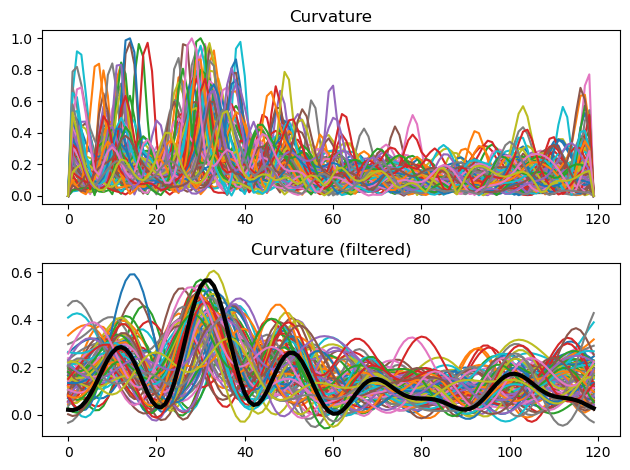

In [5]:
# 对brava数据进行处理

brava_curvatures=[]
brava_curves = []
freq_threshold = 0.06
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# ax3 = fig.add_subplot(313)


for i in range(Len_brava):
    casename = brava_files[i].split('\\')[-1].split('.')[0]
    temp = Get_simple_vtk(brava_files[i])
    temp = translate_to_centroid(temp)
    temp_func = parameterize_curve(temp) # 重参数化，归一化，成了单位长度?(看输出不是)
    t_resampled = np.linspace(0, 1, resample_num) # 重采样，生成一个从 0 到 1 的均匀分布
    resampled_curve = temp_func(t_resampled) # 用重采样的 t 值生成新的曲线
    brava_curves.append(resampled_curve)
    c, t = compute_curvature_and_torsion(resampled_curve)
    ax1.plot(c, label=casename)
    fft_c = remove_high_freq_components(c, freq_threshold ) # 傅里叶变换去高频
    rebuild = build_curve_from_curvatures(fft_c, step_length=0.1)
    ax2.plot(fft_c, label=casename)
    ax1.set_title('Curvature')
    ax2.set_title('Curvature (filtered)')
    # ax3.plot(rebuild[0], rebuild[1], label=casename)
    # print (len(c), len(fft_c))
    brava_curvatures.append(fft_c)
brava_curvatures = np.array(brava_curvatures)

# np.save("unaligned_curvatures.npy", curvatures)
brava_mean_curve = np.mean(brava_curves, axis=0)
brava_mean_curve_curvature, _ = compute_curvature_and_torsion(brava_mean_curve)
brava_mean_curve_curvature = remove_high_freq_components(brava_mean_curve_curvature, freq_threshold)
ax2.plot(brava_mean_curve_curvature, label='Mean',linewidth=3, color='black')
plt.tight_layout()
plt.show()


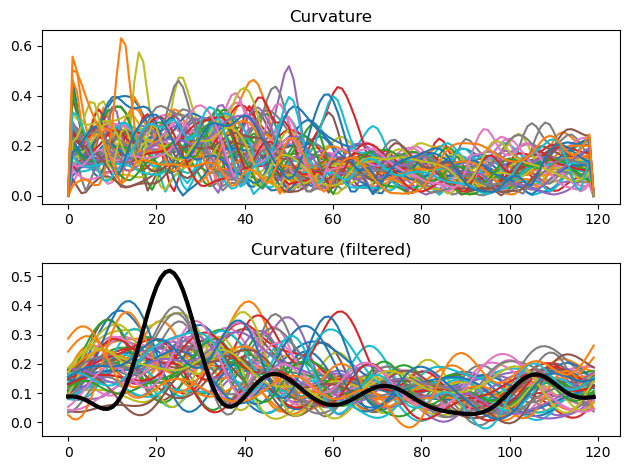

In [6]:
# 对aneurisk数据进行处理

aneurisk_curvatures=[]
aneurisk_curves = []
freq_threshold = 0.06
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
# ax3 = fig.add_subplot(313)


for i in range(Len_aneurisk):
    casename = aneurisk_files[i].split('\\')[-1].split('.')[0]
    temp = Get_simple_vtk(aneurisk_files[i])
    temp = translate_to_centroid(temp)
    temp_func = parameterize_curve(temp) # 重参数化，归一化，成了单位长度?(看输出不是)
    t_resampled = np.linspace(0, 1, resample_num) # 重采样，生成一个从 0 到 1 的均匀分布
    resampled_curve = temp_func(t_resampled) # 用重采样的 t 值生成新的曲线
    aneurisk_curves.append(resampled_curve)
    c, t = compute_curvature_and_torsion(resampled_curve)
    ax1.plot(c, label=casename)
    fft_c = remove_high_freq_components(c, freq_threshold ) # 傅里叶变换去高频
    rebuild = build_curve_from_curvatures(fft_c, step_length=0.1)
    ax2.plot(fft_c, label=casename)
    ax1.set_title('Curvature')
    ax2.set_title('Curvature (filtered)')
    # ax3.plot(rebuild[0], rebuild[1], label=casename)
    # print (len(c), len(fft_c))
    aneurisk_curvatures.append(fft_c)
aneurisk_curvatures = np.array(aneurisk_curvatures)

# np.save("unaligned_curvatures.npy", curvatures)
aneurisk_mean_curve = np.mean(aneurisk_curves, axis=0)
aneurisk_mean_curve_curvature, _ = compute_curvature_and_torsion(aneurisk_mean_curve)
aneurisk_mean_curve_curvature = remove_high_freq_components(aneurisk_mean_curve_curvature, freq_threshold)
ax2.plot(aneurisk_mean_curve_curvature, label='Mean',linewidth=3, color='black')
plt.tight_layout()
plt.show()


In [17]:
 # 下面开始用geomstats库的工具

k_sampling_points = resample_num

curves_r3 = DiscreteCurvesStartingAtOrigin(
    ambient_dim=3, k_sampling_points=k_sampling_points, equip=False
) #初始化曲线空间
curves_r3.equip_with_metric(SRVMetric) # 配置SRV度量


curve_brava_mean = curves_r3.projection(brava_mean_curve)
curve_brava_mean = curves_r3.normalize(curve_brava_mean) # 缩放为单位长度

# output_file = "bai_output/brava_reshaped_normed_mean_curve.vtk"
# output_vtk_file(curve_a, output_file)

curve_bs = []
curve_bs.append(curve_brava_mean)

for i in tqdm(range(1,len(brava_curves))):
# for i in range(4):
    curve_b = curves_r3.projection(brava_curves[i])
    curve_b = curves_r3.normalize(curve_b)

    curves_r3.equip_with_group_action("rotations and reparametrizations")
    curves_r3.equip_with_quotient_structure()

    # 先和简单平均对齐了一下？
    curve_b_aligned = curves_r3.fiber_bundle.align(curve_b, curve_brava_mean)
    curve_bs.append(np.array(curve_b))

    # hgeod_fun = curves_r3.quotient.metric.geodesic(curve_a, curve_b)

    # n_times = 10
    # times = gs.linspace(0.0, 1.0, n_times)
    # hgeod = hgeod_fun(times)

curve_bs = np.array(curve_bs)



100%|██████████| 78/78 [02:32<00:00,  1.96s/it]


In [36]:
# aneurisk的归一化

curve_aneurisk_bs = []
curve_aneurisk_bs.append(curve_brava_mean)

for i in tqdm(range(1,len(aneurisk_curves))):
# for i in range(4):
    curve_b = curves_r3.projection(aneurisk_curves[i])
    curve_b = curves_r3.normalize(curve_b)

    curves_r3.equip_with_group_action("rotations and reparametrizations")
    curves_r3.equip_with_quotient_structure()

    curve_aneurisk_bs.append(np.array(curve_b))

    # hgeod_fun = curves_r3.quotient.metric.geodesic(curve_a, curve_b)

    # n_times = 10
    # times = gs.linspace(0.0, 1.0, n_times)
    # hgeod = hgeod_fun(times)

curve_aneurisk_bs = np.array(curve_aneurisk_bs)

# 输出保存在curve_aneurisk_bs

100%|██████████| 51/51 [00:00<00:00, 6374.13it/s]


In [62]:

# 把归一化后的aneurisk截取前100个点
# 然后再重采样到120个点
n = 100
curve_aneurisk_bs = curve_aneurisk_bs[:, :n, :]
resample_num = 120

aneurisk_curves = []
freq_threshold = 0.06

curve_aneurisk_resampled = []
for i in range(len(curve_aneurisk_bs)):

    temp = curve_aneurisk_bs[i]
    temp = translate_to_centroid(temp)
    temp_func = parameterize_curve(temp) # 重参数化，归一化，成了单位长度?(看输出不是)
    t_resampled = np.linspace(0, 1, resample_num) # 重采样，生成一个从 0 到 1 的均匀分布
    resampled_curve = temp_func(t_resampled) # 用重采样的 t 值生成新的曲线
    aneurisk_curves.append(resampled_curve)
    

# 输出保存在aneurisk_curves

In [65]:
np.array(aneurisk_curves).shape

output_file = "bai_output/curve_aneurisk_cutted0.vtk"
output_vtk_file(aneurisk_curves[5], output_file)

形状的VTK文件已保存至: bai_output/curve_aneurisk_cutted0.vtk


In [10]:
# 单独的一根对齐

k_sampling_points = resample_num

curves_r3 = DiscreteCurvesStartingAtOrigin(
    ambient_dim=3, k_sampling_points=k_sampling_points, equip=False
) # geomstats库中的类,初始化曲线空间

curves_r3.equip_with_metric(SRVMetric) # geomstats库中的类,配置SRV度量
curve_aneurisk0 = curves_r3.projection(aneurisk_curves[0])
curve_aneurisk0 = curves_r3.normalize(curve_aneurisk0) # 缩放为单位长度





output_file = "bai_output/curve_aneurisk0.vtk"
output_vtk_file(curve_aneurisk0, output_file)


形状的VTK文件已保存至: bai_output/curve_aneurisk0.vtk


In [11]:
# 上面那个输出结果有问题，下面那单独的一根试试

k_sampling_points = resample_num

curves_r3 = DiscreteCurvesStartingAtOrigin(
    ambient_dim=3, k_sampling_points=k_sampling_points, equip=False
) # geomstats库中的类,初始化曲线空间

curves_r3.equip_with_metric(SRVMetric) # geomstats库中的类,配置SRV度量
brava_curves17 = curves_r3.projection(brava_curves[17])
brava_curves17 = curves_r3.normalize(brava_curves17) # 缩放为单位长度


curves_r3.equip_with_group_action("rotations and reparametrizations")
curves_r3.equip_with_quotient_structure()


brava_curves17_aligned = curves_r3.fiber_bundle.align(brava_curves17, curve_brava_mean) # reference curve is curve_a
# curve_bs.append(np.array(curve_b))


output_file = "bai_output/brava_curves17_aligned.vtk"
output_vtk_file(brava_curves17_aligned, output_file)

形状的VTK文件已保存至: bai_output/brava_curves17_aligned.vtk


In [40]:
mean = FrechetMean(curves_r3)
brava_curves_norm = np.array(curve_bs)
mean.fit(brava_curves_norm)

mean_estimate = mean.estimate_

output_file = "bai_output/brava_FrechetMean.vtk"
output_vtk_file(mean_estimate, output_file)

形状的VTK文件已保存至: bai_output/brava_FrechetMean.vtk


In [41]:
type(mean_estimate)

numpy.ndarray

In [42]:
mean_estimate.shape


(119, 3)

In [74]:
# aneurisk的对齐

brava_frechet_mean = mean_estimate
aneurisk_curves = np.array(aneurisk_curves)



# 检查是否有无效值并替换或删除它们
def clean_data(curves):
    # 假设曲线是一个NumPy数组
    if np.any(np.isnan(curves)):
        # 可以选择填充NaN值，或选择删除含有NaN值的曲线
        # 这里我们选择删除含有NaN的曲线
        curves = curves[~np.isnan(curves).any(axis=(1, 2))]
    if np.any(np.isinf(curves)):
        # 删除含有无穷值的曲线
        curves = curves[~np.isinf(curves).any(axis=(1, 2))]
    return curves

# 应用数据清理
aneurisk_curves = clean_data(aneurisk_curves)

curve_aneurisk_alined = []
curve_aneurisk_alined.append(brava_frechet_mean)

curve_aneurisk_usable = []
curve_aneurisk_usable.append(brava_frechet_mean)

for i in tqdm(range(1, len(aneurisk_curves))):
    curve_b = curves_r3.projection(aneurisk_curves[i])
    curve_b = curves_r3.normalize(curve_b)
    
    curves_r3.equip_with_group_action("rotations and reparametrizations")
    curves_r3.equip_with_quotient_structure()
    
    try:
        curve_b_aligned = curves_r3.fiber_bundle.align(curve_b, brava_frechet_mean)
        curve_aneurisk_alined.append(curve_b_aligned)
        curve_aneurisk_usable.append(curve_b)
        
    except ValueError as e:
        print(f"Error aligning curve {i}: {e}")

curve_aneurisk_alined = np.array(curve_aneurisk_alined)
np.save('bai_output/curve_aneurisk_aligned.npy', curve_aneurisk_alined)

curve_aneurisk_usable = np.array(curve_aneurisk_usable)
np.save('bai_output/curve_aneurisk_usable.npy', curve_aneurisk_usable)

  8%|▊         | 4/51 [00:16<02:34,  3.30s/it]c:\Users\14014\anaconda3\envs\chen_conda_ev\Lib\site-packages\geomstats\geometry\discrete_curves.py:300: RuntimeWarning: divide by zero encountered in divide
  "...ij,...i->...ij", velocity, 1.0 / gs.sqrt(pointwise_velocity_norm)
c:\Users\14014\anaconda3\envs\chen_conda_ev\Lib\site-packages\geomstats\numerics\finite_differences.py:38: RuntimeWarning: invalid value encountered in subtract
  return (forward - center) / delta
c:\Users\14014\anaconda3\envs\chen_conda_ev\Lib\site-packages\geomstats\numerics\finite_differences.py:76: RuntimeWarning: invalid value encountered in subtract
  diff = (forward - backward) / (2 * delta)
c:\Users\14014\anaconda3\envs\chen_conda_ev\Lib\site-packages\geomstats\numerics\finite_differences.py:129: RuntimeWarning: invalid value encountered in subtract
  return (forward + backward - 2 * central) / (delta**2)
c:\Users\14014\anaconda3\envs\chen_conda_ev\Lib\site-packages\geomstats\numerics\finite_differences.py:

Error aligning curve 5: `y` must contain only finite values.


100%|██████████| 51/51 [04:54<00:00,  5.77s/it]


In [72]:
aneurisk_curves[10]
output_file = "bai_output/aneurisk_test/aneurisk10.vtk"
output_vtk_file(mean_estimate, output_file)

形状的VTK文件已保存至: bai_output/aneurisk_test/aneurisk10.vtk
